
# SS21 Catalog Marketing Project


### Project Goal:
Use data from 2020 to optimize mailing in 2021
### Background:
our target var is results of mailing a catalog to customers in 2020

Breakeven of catalog for 2021 is 10.00 dollars
### Define metrics:
how much a user gonna spend after get a catelog ---> dollar spent

classification ---> Should we mail a catalog probability

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
data = pd.read_excel('SS21 Catalog Marketing Project.xlsx',sheet_name='Sheet1')
info = pd.read_excel('SS21 Catalog Marketing Project.xlsx',sheet_name='Project')

In [3]:
info.dropna(how='all').dropna(axis=1,how='all')

,Unnamed: 0,Unnamed: 3
1,Target or Independent variable=,Target_Rev
3,Target is results of mailing a catalog to cust...,NaN
5,Goal: Use data from 2019 to optimize mailing i...,NaN
7,Breakeven of catalog in 2020 is $10.00,NaN
9,Use best predictive modeling to achieve this goal,NaN
11,Columns B through M are independent variables ...,NaN
13,Use R or Python or SAS,NaN


In [4]:
data.head()

,Customer ID,Size,Number Of Web Visits,12Months Net Rev,24Months Net Rev,Loyalty Program Status,Loyalty Program Weeks,12Months Orders,12Months Rev,Time Since Last Purchase,Corporate Orders,Corporate Rev,Diff,Gender,Age Group,Target Rev
0,10629,9.0,0,182,258,N,520.0,0,0,74,0,0,-182,1,7,0.0
1,4553,4.0,0,210,408,N,520.0,1,45,49,1,45,-165,1,6,0.0
2,6454,4.0,0,482,482,N,520.0,3,343,10,3,343,-139,1,7,0.0
3,8331,4.0,0,227,289,N,520.0,1,104,46,1,104,-123,1,5,0.0
4,8151,6.0,0,317,900,Y,183.0,1,95,6,3,211,-106,1,6,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
Customer ID                 10000 non-null int64
Size                        9748 non-null float64
Number Of Web Visits        10000 non-null int64
12Months Net Rev            10000 non-null int64
24Months  Net Rev           10000 non-null int64
Loyalty Program Status      9978 non-null object
Loyalty Program Weeks       9975 non-null float64
12Months Orders             10000 non-null int64
12Months Rev                10000 non-null int64
Time Since Last Purchase    10000 non-null int64
Corporate Orders            10000 non-null int64
Corporate Rev               10000 non-null int64
Diff                        10000 non-null int64
Gender                      10000 non-null int64
Age Group                   10000 non-null int64
Target Rev                  9973 non-null float64
dtypes: float64(3), int64(12), object(1)
memory usage: 1.2+ MB


In [6]:
data.describe()
# higher variance has more information
# Number Of Web Visits=0, 2019? -----> not interested in catalog at all? -----> why still have revenue, other source of buying?
# funnel : prob that a user will open

,Customer ID,Size,Number Of Web Visits,12Months Net Rev,24Months Net Rev,Loyalty Program Weeks,12Months Orders,12Months Rev,Time Since Last Purchase,Corporate Orders,Corporate Rev,Diff,Gender,Age Group,Target Rev
count,10000.00000,9748.000000,10000.000000,10000.000000,10000.000000,9975.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9973.000000
mean,6000.50000,5.584941,0.315100,77.841500,159.512700,444.146967,1.253300,90.496000,45.634500,3.742500,259.133000,181.291500,1.02310,6.638600,11.453614
std,2886.89568,1.772326,1.561876,168.998171,289.734445,193.563400,2.265183,192.669946,58.204337,6.040997,439.766831,344.503613,0.25529,1.489702,45.926093
min,1001.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-182.000000,0.00000,1.000000,0.000000
25%,3500.75000,4.000000,0.000000,0.000000,0.000000,335.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,1.00000,6.000000,0.000000
50%,6000.50000,6.000000,0.000000,0.000000,61.000000,520.000000,0.000000,0.000000,25.000000,2.000000,120.000000,60.000000,1.00000,7.000000,0.000000
75%,8500.25000,7.000000,0.000000,90.000000,193.000000,520.000000,2.000000,105.000000,59.000000,5.000000,335.000000,228.250000,1.00000,8.000000,0.000000
max,11000.00000,10.000000,46.000000,4021.000000,7185.000000,999.000000,47.000000,4602.000000,425.000000,114.000000,11526.000000,10623.000000,2.00000,9.000000,1102.720000


# Missing Values

In [7]:
data.isnull().sum()

Customer ID                   0
Size                        252
Number Of Web Visits          0
12Months Net Rev              0
24Months  Net Rev             0
Loyalty Program Status       22
Loyalty Program Weeks        25
12Months Orders               0
12Months Rev                  0
Time Since Last Purchase      0
Corporate Orders              0
Corporate Rev                 0
Diff                          0
Gender                        0
Age Group                     0
Target Rev                   27
dtype: int64

In [8]:
# impute missing - Size
    # why missing: avg size-----> impute using mode
data['Size'].fillna(data['Size'].mode()[0],inplace=True)

In [9]:
# drop observation when 'Target Rev' is missing
data.dropna(subset=['Target Rev'],inplace=True)
len(data)

9973

In [10]:
# impute Loyalty Program Status & Loyalty Program Weeks 
null_LPS_index = data['Loyalty Program Status'][data['Loyalty Program Status'].isnull()].index.values
null_LPW_index = data['Loyalty Program Weeks'][data['Loyalty Program Weeks'].isnull()].index.values
null_ind = list(set(list(null_LPS_index)+list(null_LPW_index)))

data.loc[null_ind]

,Customer ID,Size,Number Of Web Visits,12Months Net Rev,24Months Net Rev,Loyalty Program Status,Loyalty Program Weeks,12Months Orders,12Months Rev,Time Since Last Purchase,Corporate Orders,Corporate Rev,Diff,Gender,Age Group,Target Rev
768,2888,6.0,0,200,260,C,NaN,3,200,2,3,200,0,1,6,137.96
769,2889,6.0,0,0,0,N,NaN,0,0,110,0,0,0,1,9,0.00
3462,10799,5.0,0,70,70,NaN,NaN,1,70,37,1,70,0,1,1,0.00
5000,10952,5.0,0,98,98,NaN,520.0,2,98,6,3,158,60,1,5,0.00
6024,10786,5.0,0,26,26,NaN,NaN,2,36,19,5,136,110,1,8,0.00
3984,10652,5.0,5,93,105,N,NaN,5,93,24,7,113,20,1,8,19.99
5784,2932,6.0,0,0,0,N,NaN,0,0,20,2,98,98,1,7,0.00
6426,10803,5.0,0,108,108,NaN,NaN,1,243,36,1,243,135,1,4,0.00
4891,1095,4.0,0,31,31,NaN,520.0,1,30,28,2,88,57,0,5,87.93
4125,10774,5.0,0,631,631,NaN,NaN,5,629,1,6,658,27,1,6,0.00


In [11]:
print('For Loyalty Program Weeks == 520:')
print(data['Loyalty Program Status'][data['Loyalty Program Weeks']==520].value_counts())
print()
print('For Loyalty Program Status == N:')
print(data['Loyalty Program Weeks'][data['Loyalty Program Status']=='N'].value_counts())

For Loyalty Program Weeks == 520:
N    5984
Y       2
Name: Loyalty Program Status, dtype: int64

For Loyalty Program Status == N:
520.0    5984
Name: Loyalty Program Weeks, dtype: int64


In [12]:
# drop data when both 'Loyalty Program Status' and 'Loyalty Program Weeks' are null
# drop data for 'Loyalty Program Status'='C'
# impute 'N' for missing value in 'Loyalty Program Status' when 'Loyalty Program Weeks'=520
# impute 520 for missing value in 'Loyalty Program Weeks' when 'Loyalty Program Status' = 'N'
data.dropna(subset=['Loyalty Program Status','Loyalty Program Weeks'],how='all',inplace=True)
data.drop(index=[768],inplace=True)

data['Loyalty Program Status'].fillna('N',inplace=True)
data['Loyalty Program Weeks'].fillna(520,inplace=True)

data.isnull().sum()

Customer ID                 0
Size                        0
Number Of Web Visits        0
12Months Net Rev            0
24Months  Net Rev           0
Loyalty Program Status      0
Loyalty Program Weeks       0
12Months Orders             0
12Months Rev                0
Time Since Last Purchase    0
Corporate Orders            0
Corporate Rev               0
Diff                        0
Gender                      0
Age Group                   0
Target Rev                  0
dtype: int64

# EDA

In [13]:
# Categorical: 
cat_var = ['Loyalty Program Status','Gender']
# Numerical:
num_var = [ 'Size', 'Number Of Web Visits', '12Months Net Rev','24Months  Net Rev', 'Loyalty Program Weeks', '12Months Orders', 
           '12Months Rev', 'Time Since Last Purchase', 'Corporate Orders', 'Corporate Rev', 'Age Group','Target Rev']
# Unique ID:
id = ['Customer ID']

In [14]:
# check outlier
def check_net_rev(x):
    if x[1] > x[0]:
        return 1
    else:
        return 0
data['check_net_rev']=data[['Corporate Rev','12Months Net Rev']].apply(check_net_rev,axis=1)
data[['Corporate Rev','12Months Net Rev']][data['check_net_rev']==1].head()

,Corporate Rev,12Months Net Rev
0,0,182
1,45,210
2,343,482
3,104,227
4,211,317


In [15]:
# create a new column: Target_Rev > 0 or not?
def check_tar(x):
    if x > 0:
        return 1
    else:
        return 0
data['Tar_rev>0']=data['Target Rev'].apply(check_tar)
data['Tar_rev>0'].sum() # imbalanced

1104

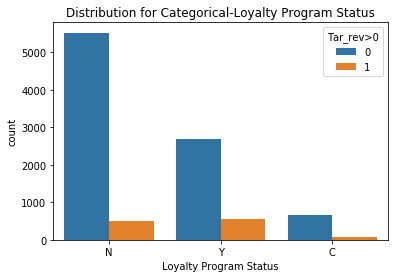

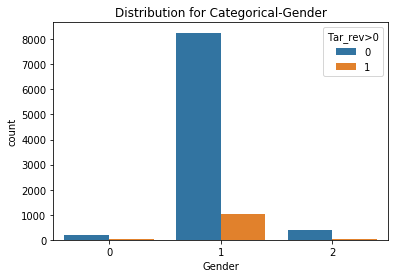

In [16]:
for var in cat_var:
    #fig,ax = plt.subplots(1,2,figsize=(15,6))
    sns.countplot(x=var,hue='Tar_rev>0',data=data)
    plt.title('Distribution for Categorical-{}'.format(var))
    plt.show()
# gender maynot give us many infomation.

In [17]:
# For numerical variable
# 1. 'Corporate Orders' includes '12Months Orders'; 'Corporate Rev' includes '12Months Rev'
# 2. Size-disceret

Text(0.5,1,'Distribution for Categorical-Size')

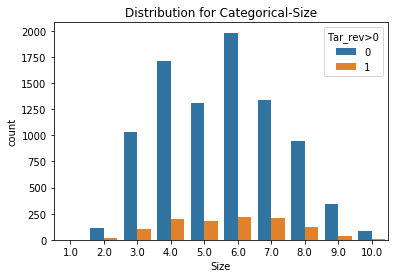

In [18]:
# For Disceret: Size
sns.countplot(x='Size',hue='Tar_rev>0',data=data)
plt.title('Distribution for Categorical-{}'.format('Size'))

Text(0.5,1,'Distribution for Categorical-Age Group')

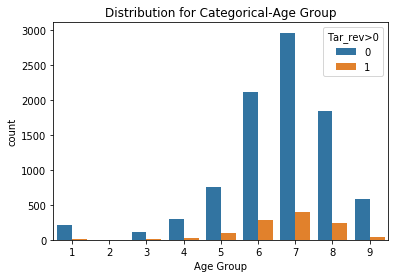

In [19]:
# For Disceret: Age Group
sns.countplot(x='Age Group',hue='Tar_rev>0',data=data)
plt.title('Distribution for Categorical-{}'.format('Age Group'))

<Figure size 1440x1440 with 0 Axes>

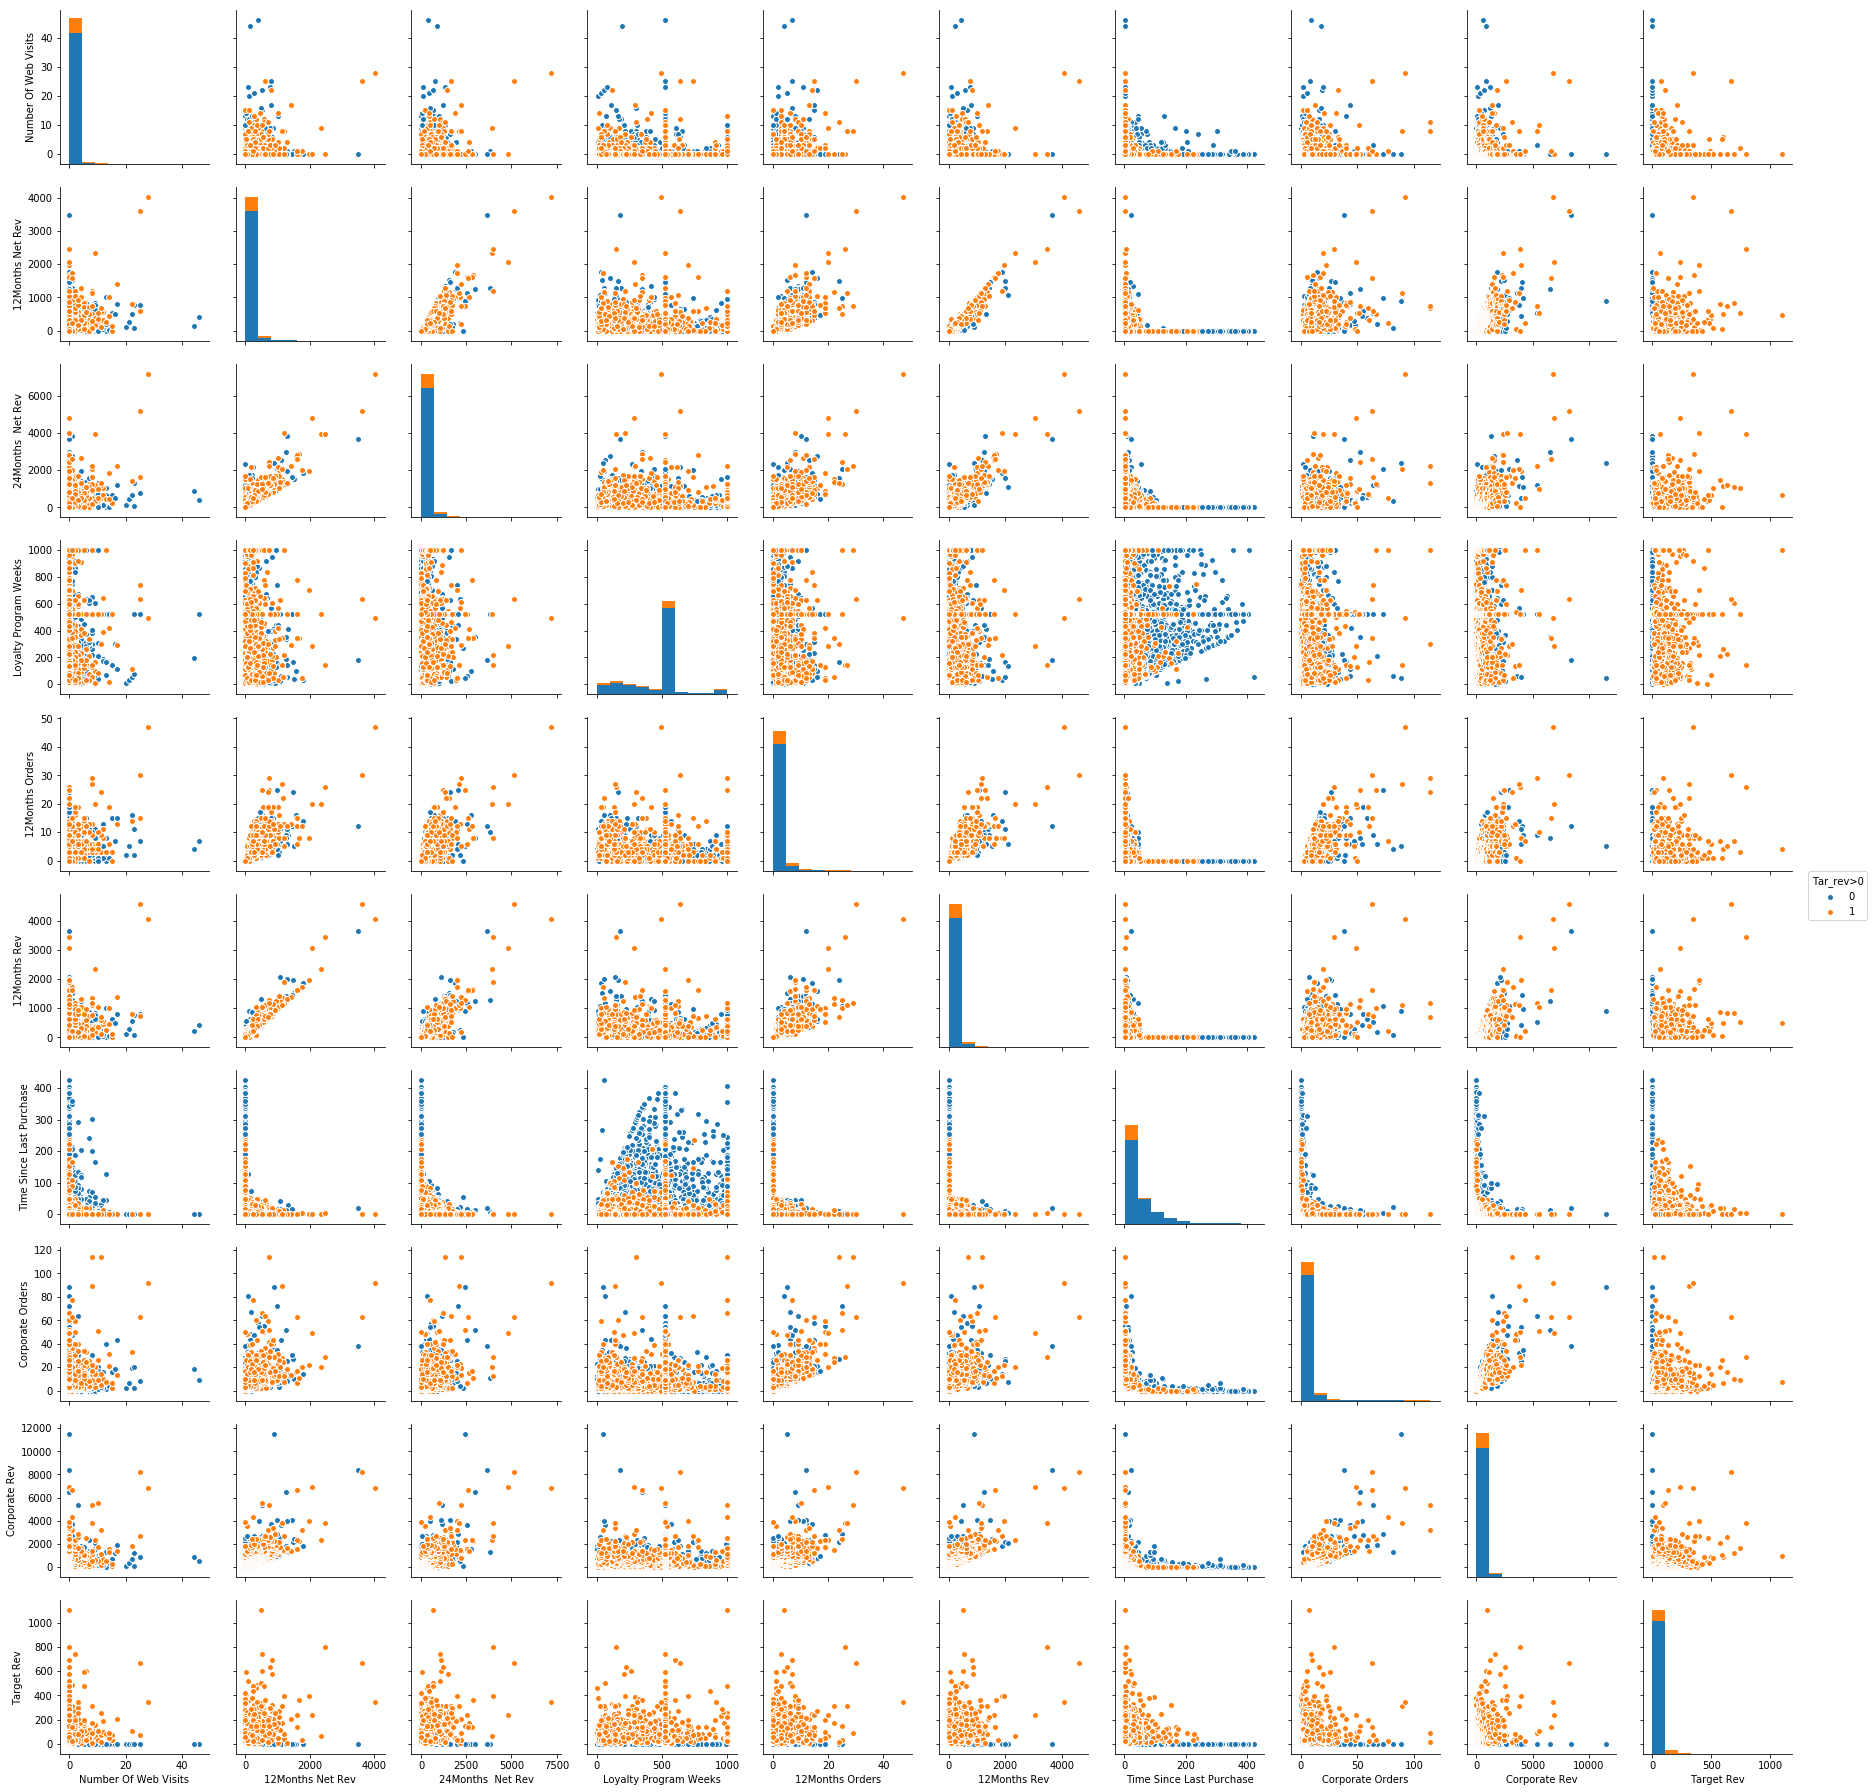

In [20]:
# Pairplot to see multicollinearity among dependent Var
pp_var = [ 'Number Of Web Visits', '12Months Net Rev','24Months  Net Rev', 'Loyalty Program Weeks', '12Months Orders', 
           '12Months Rev', 'Time Since Last Purchase', 'Corporate Orders', 'Corporate Rev', 'Target Rev']
plt.figure(figsize=(20,20))
sns.pairplot(data,hue='Tar_rev>0',vars=pp_var)
plt.show()
#plt.savefig('pairplot_for_numerical.jpg')

# If Regression:
    # '12Months Net Rev','24Months  Net Rev', ---> '24Months  Net Rev'-'12Months Net Rev'
    # '12Months Orders', 'Corporate Orders', ---> calculate amount per coperate order
    # '12Months Rev' ( '12Months Orders' )  ---> calculate rev per order
    # transform for target_var

In [21]:
# 'AVG Amount per order' ---> 12Months Rev' ,'12Months Orders' 
def avg_amount(x):
    if x[1] == 0:
        return 0
    else:
        return x[0]/x[1]
data['avg_amount_12m'] = data[['12Months Rev','12Months Orders']].apply(avg_amount,axis=1)
data['avg_amount_corp'] = data[['Corporate Rev','Corporate Orders']].apply(avg_amount,axis=1)

data['12-24 Net Rev'] = data[['24Months  Net Rev','12Months Net Rev']].apply(lambda x:x[0]-x[1],axis=1)
# drop '12Months Net Rev'/ '24Months  Net Rev'-'12Months Net Rev'
num_var = ['Size','Number Of Web Visits','12-24 Net Rev','Loyalty Program Weeks', '12Months Orders',
 'avg_amount_12m','Time Since Last Purchase','avg_amount_corp','Corporate Rev','Age Group']


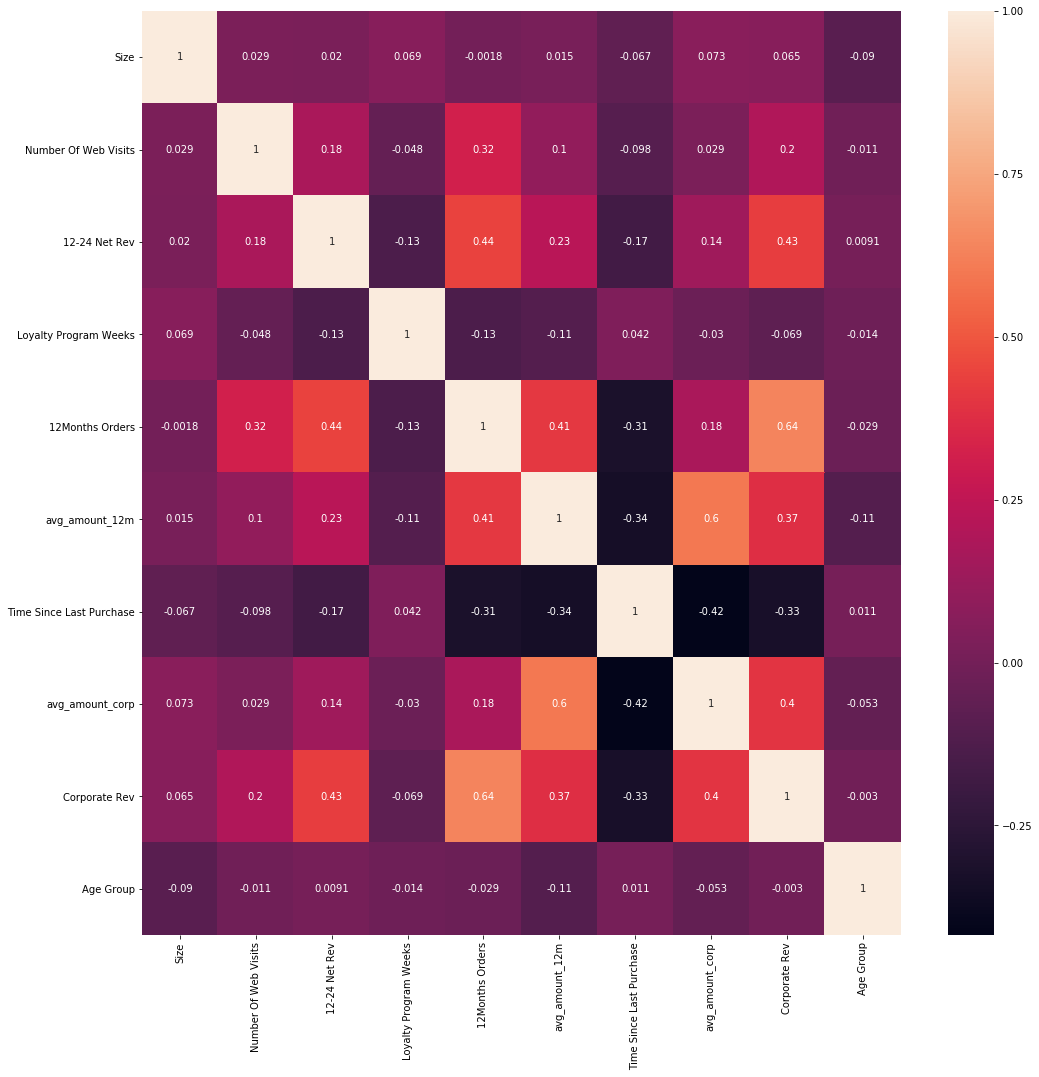

In [22]:
plt.figure(figsize=(17,17))
sns.heatmap(data[num_var].corr(),annot=True)

In [248]:
'''
pp_var = [ 'Number Of Web Visits', '24Months  Net Rev', 'Loyalty Program Weeks', '12Months Orders', 
           'avg_amount_12m', 'Time Since Last Purchase', 'avg_amount_corp', 'Corporate Rev', 'Target Rev']
plt.figure(figsize=(20,20))
sns.pairplot(data,hue='Tar_rev>0',vars=pp_var)
plt.show()
'''

"\npp_var = [ 'Number Of Web Visits', '24Months  Net Rev', 'Loyalty Program Weeks', '12Months Orders', \n           'avg_amount_12m', 'Time Since Last Purchase', 'avg_amount_corp', 'Corporate Rev', 'Target Rev']\nplt.figure(figsize=(20,20))\nsns.pairplot(data,hue='Tar_rev>0',vars=pp_var)\nplt.show()\n"

In [24]:
def log_y(x):
    return np.log(x+1)
data['log_y'] = data['Target Rev'].apply(log_y)
#data[['Target Rev','log_y']]

## One Hot Encoding

In [25]:
data_enc = pd.get_dummies(data,prefix_sep='_',columns=['Loyalty Program Status'])
data_enc.head()

,Customer ID,Size,Number Of Web Visits,12Months Net Rev,24Months Net Rev,Loyalty Program Weeks,12Months Orders,12Months Rev,Time Since Last Purchase,Corporate Orders,...,Target Rev,check_net_rev,Tar_rev>0,avg_amount_12m,avg_amount_corp,12-24 Net Rev,log_y,Loyalty Program Status_C,Loyalty Program Status_N,Loyalty Program Status_Y
0,10629,9.0,0,182,258,520.0,0,0,74,0,...,0.0,1,0,0.000000,0.000000,76,0.0,0,1,0
1,4553,4.0,0,210,408,520.0,1,45,49,1,...,0.0,1,0,45.000000,45.000000,198,0.0,0,1,0
2,6454,4.0,0,482,482,520.0,3,343,10,3,...,0.0,1,0,114.333333,114.333333,0,0.0,0,1,0
3,8331,4.0,0,227,289,520.0,1,104,46,1,...,0.0,1,0,104.000000,104.000000,62,0.0,0,1,0
4,8151,6.0,0,317,900,183.0,1,95,6,3,...,0.0,1,0,95.000000,70.333333,583,0.0,0,0,1


In [26]:
features = ['Gender'] + num_var +['Loyalty Program Status_C','Loyalty Program Status_N','Loyalty Program Status_Y']
target = ['Target Rev']

# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
x = data_enc[features]
y = data_enc[target]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_m = RandomForestRegressor(n_estimators=700,verbose=1)
res_rf = rf_m.fit(x_train,y_train)

C:\Users\kangy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:   18.4s finished


In [29]:
from sklearn.metrics import r2_score,mean_squared_error

pred_rf = res_rf.predict(x_test)
print('R^2 is ', round(r2_score(y_test,pred_rf),3) )
print('rmse is ', round(np.sqrt(mean_squared_error(y_test,pred_rf)),3))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R^2 is  0.015
rmse is  47.361


[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.1s finished


In [30]:

feature_imp = pd.DataFrame(features,res_rf.feature_importances_).reset_index()
feature_imp.columns=['importance','feature']
feature_imp.sort_values(by=['importance'],ascending=False)

,importance,feature
9,0.144443,Corporate Rev
3,0.134600,12-24 Net Rev
8,0.128880,avg_amount_corp
6,0.116109,avg_amount_12m
4,0.113193,Loyalty Program Weeks
5,0.110826,12Months Orders
7,0.095731,Time Since Last Purchase
1,0.054021,Size
10,0.045287,Age Group
2,0.031423,Number Of Web Visits


# Normalization

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

C:\Users\kangy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kangy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\kangy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [32]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(np.asarray(y_train),np.asarray(x_train_s))

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     82.74
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          1.57e-207
Time:                        04:40:13   Log-Likelihood:                -41475.
No. Observations:                7971   AIC:                         8.298e+04
Df Residuals:                    7958   BIC:                         8.307e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0222      0.497      0.045      0.9

In [33]:
pred_ols = res.predict(x_test_s)

print('R^2 is ', round(r2_score(y_test,pred_ols),3) )
print('rmse is ', round(np.sqrt(mean_squared_error(y_test,pred_ols)),3))

R^2 is  0.07
rmse is  46.013


In [38]:
# remove negative
pred_ols = [i  if i > 0 else 0 for i in pred_ols]
print('R^2 is ', round(r2_score(y_test,pred_ols),3) )
print('rmse is ', round(np.sqrt(mean_squared_error(y_test,pred_ols)),3))

R^2 is  0.109
rmse is  45.034


In [34]:
y_train.mean()

Target Rev    11.432641
dtype: float64

# Classification problem

In [93]:
target = ['Tar_rev>0']

x = data_enc[features]
y = data[target]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [94]:
## Under Sampling
X = pd.concat([x_train,y_train],axis=1)
#print(X)
df_0 = np.random.choice(X[X[target]==0].index,len(X[X[target]==1]),replace=False)
df_1 = np.random.choice(X[X[target]==1].index,len(X[X[target]==1]),replace=False)
pd.concat([X[X[target]==0].loc[df_0],X[X[target]==1].loc[df_1]])

df_undersampled = pd.concat([X.loc[df_0]])
#df_undersampled
x_train = df_undersampled[features]
y_train = df_undersampled.iloc[:,-1]

x_train.head()

,Gender,Size,Number Of Web Visits,12-24 Net Rev,Loyalty Program Weeks,12Months Orders,avg_amount_12m,Time Since Last Purchase,avg_amount_corp,Corporate Rev,Age Group,Loyalty Program Status_C,Loyalty Program Status_N,Loyalty Program Status_Y
118,1,8.0,0,0,520.0,3,154.666667,37,154.666667,464,8,0,1,0
230,1,5.0,0,60,520.0,0,0.000000,55,0.000000,0,7,0,1,0
9702,1,4.0,0,198,520.0,0,0.000000,1,241.750000,967,6,0,1,0
3274,1,6.0,0,57,520.0,0,0.000000,103,0.000000,0,7,0,1,0
3417,1,5.0,0,0,520.0,1,53.000000,35,53.000000,53,1,0,1,0


In [95]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300)
res_rf = rf.fit(x_train,y_train)

In [96]:
res_rf.feature_importances_

array([0.01165418, 0.07314985, 0.03118345, 0.1257851 , 0.07877898,
       0.08189171, 0.11052278, 0.13036954, 0.1278515 , 0.14462401,
       0.05847834, 0.00555484, 0.00959303, 0.0105627 ])

In [97]:

feat_df = pd.DataFrame(columns=['importance'])
for i in range(len(features)):
    feat_df.loc[features[i]] = round(res_rf.feature_importances_[i],3)
    #print(feat[i],'-----',round(res_rf.feature_importances_[i],3))
feat_df.sort_values('importance',ascending=False)

# amount paid each order
# time since last purchase

,importance
Corporate Rev,0.145
Time Since Last Purchase,0.130
avg_amount_corp,0.128
12-24 Net Rev,0.126
avg_amount_12m,0.111
12Months Orders,0.082
Loyalty Program Weeks,0.079
Size,0.073
Age Group,0.058
Number Of Web Visits,0.031


In [98]:
predrf = res_rf.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

[[1763   18]
 [ 197   15]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1781
           1       0.45      0.07      0.12       212

   micro avg       0.89      0.89      0.89      1993
   macro avg       0.68      0.53      0.53      1993
weighted avg       0.85      0.89      0.86      1993

